In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [104]:
# import data
forest_cov = pd.read_csv('Forest_land.csv')
agriculture_land = pd.read_csv('Agriculture_land.csv')
metadata_agriculture = pd.read_csv('Metadata_Agriculture.csv')
metadata_forest_cov = pd.read_csv('Metadata_forest.csv')
GDP = pd.read_csv('GDP.csv')
meat_consumption = pd.read_csv('meat_consumption.csv')


In [77]:
income = metadata_agriculture['IncomeGroup'].tolist()
income = pd.DataFrame(income, columns = ['Country Income'])
#income

In [78]:

country_name = agriculture_land.T.iloc[0].tolist()

df_country_name = pd.DataFrame(country_name, columns = ['Country Name'])
#df_country_name



In [79]:
country_code = agriculture_land.T.iloc[1].tolist()

df_country_code = pd.DataFrame(country_code, columns = ['Country Code'])
#df_country_code



In [13]:
#Hypothesis 1: there would be a negative correlation between the agriculture land hold by a country and the forest coverage.
#agriculture_land.T.iloc[34:-1]
avg_ch_rate_agriculture = []
for i in range(263):
    val = agriculture_land.loc[i].iloc[4:].pct_change(fill_method='ffill').mean(skipna = True)
    avg_ch_rate_agriculture.append(val)
avg_ch_rate_agriculture
df_agr = pd.DataFrame(avg_ch_rate_agriculture, columns = ['slope_agr'])
df_agr

,slope_agr
0,0.000000
1,0.000095
2,0.000591
3,-0.000605
4,-0.005391
5,0.004684
6,0.012565
7,0.001321
8,0.013264
9,0.008981


In [84]:
df = pd.concat([df_country_name,df_country_code, income, df_agr],axis=1, join='inner')
df


,Country Name,Country Code,Country Income,slope_agr
0,Aruba,ABW,High income,0.000000
1,Afghanistan,AFG,Low income,0.000095
2,Angola,AGO,Lower middle income,0.000591
3,Albania,ALB,Upper middle income,-0.000605
4,Andorra,AND,High income,-0.005391
5,Arab World,ARB,NaN,0.004684
6,United Arab Emirates,ARE,High income,0.012565
7,Argentina,ARG,Upper middle income,0.001321
8,Armenia,ARM,Upper middle income,0.013264
9,American Samoa,ASM,Upper middle income,0.008981


In [83]:

gdp = GDP.set_index('year').iloc[-3].tolist()
for i in range(0, len(gdp)): 
    if type(gdp[i]) == str:
        gdp[i] = float(gdp[i].replace(',','')) 

gdp_2008 = pd.DataFrame(gdp, columns = ['GDP_2008'])
gdp_list = list(GDP)[1:]
gdp_list = [x.rstrip(' ') for x in gdp_list]

df_gdp = pd.DataFrame(gdp_list, columns = ['Country Name'])

df_gdp = pd.concat([df_gdp, gdp_2008],axis=1).dropna()
df_gdp.columns = df_gdp.columns.str.rstrip()
df_gdp

,Country Name,GDP_2008
0,Austria,24565.0
1,Belgium,23701.0
2,Denmark,24789.0
3,Finland,24694.0
4,France,22057.0
5,Germany,20801.0
6,Italy,19460.0
7,Netherlands,25112.0
8,Norway,28464.0
9,Sweden,25181.0


In [85]:
df_4 = pd.merge(df, df_gdp, how = 'inner', on = ['Country Name'])
df_4

,Country Name,Country Code,Country Income,slope_agr,GDP_2008
0,Afghanistan,AFG,Low income,0.000095,869.0
1,Angola,AGO,Lower middle income,0.000591,1599.0
2,Albania,ALB,Upper middle income,-0.000605,5010.0
3,Argentina,ARG,Upper middle income,0.001321,9972.0
4,Armenia,ARM,Upper middle income,0.013264,11647.0
5,Australia,AUS,High income,-0.003563,25218.0
6,Austria,AUT,High income,-0.004806,24565.0
7,Azerbaijan,AZE,Upper middle income,0.002786,7871.0
8,Burundi,BDI,Low income,0.004591,479.0
9,Belgium,BEL,High income,-0.001398,23701.0


In [17]:
avg_ch_rate_for = []
for i in range(263):
    val = forest_cov.loc[i].iloc[4:].pct_change(fill_method='ffill').mean(skipna = True)
    avg_ch_rate_for.append(val)
avg_ch_rate_for
df_for = pd.DataFrame(avg_ch_rate_for, columns = ['slope_forest'])
df_for

,slope_forest
0,0.000000
1,0.000000
2,-0.002101
3,-0.000898
4,0.000000
5,-0.001128
6,0.010819
7,-0.009967
8,-0.000323
9,-0.001906


In [18]:
for_2008 = forest_cov['2008'].tolist()
forest_2008 = pd.DataFrame(for_2008, columns = ['Forest_2008_% of land area'])
forest_2008

,Forest_2008_% of land area
0,2.333333
1,2.067825
2,47.108046
3,28.421168
4,34.042553
5,1.706228
6,4.437905
7,10.681517
8,11.640323
9,88.900003


In [27]:
df_3 = pd.concat([df_country_name,df_country_code, income,df_agr, df_for, forest_2008],axis=1, join='inner')
df_3

,Country Name,Country Code,Country Income,slope_agr,slope_forest,Forest_2008_% of land area
0,Aruba,ABW,High income,0.000000,0.000000,2.333333
1,Afghanistan,AFG,Low income,0.000095,0.000000,2.067825
2,Angola,AGO,Lower middle income,0.000591,-0.002101,47.108046
3,Albania,ALB,Upper middle income,-0.000605,-0.000898,28.421168
4,Andorra,AND,High income,-0.005391,0.000000,34.042553
5,Arab World,ARB,NaN,0.004684,-0.001128,1.706228
6,United Arab Emirates,ARE,High income,0.012565,0.010819,4.437905
7,Argentina,ARG,Upper middle income,0.001321,-0.009967,10.681517
8,Armenia,ARM,Upper middle income,0.013264,-0.000323,11.640323
9,American Samoa,ASM,Upper middle income,0.008981,-0.001906,88.900003


In [109]:
df_4 = pd.merge(df_3, df_gdp, how = 'inner', on = ['Country Name'])
df_4

,Country Name,Country Code,Country Income,slope_agr,slope_forest,Forest_2008_% of land area,GDP_2008
0,Afghanistan,AFG,Low income,0.000095,0.000000,2.067825,869.0
1,Angola,AGO,Lower middle income,0.000591,-0.002101,47.108046,1599.0
2,Albania,ALB,Upper middle income,-0.000605,-0.000898,28.421168,5010.0
3,Argentina,ARG,Upper middle income,0.001321,-0.009967,10.681517,9972.0
4,Armenia,ARM,Upper middle income,0.013264,-0.000323,11.640323,11647.0
5,Australia,AUS,High income,-0.003563,-0.001099,16.268956,25218.0
6,Austria,AUT,High income,-0.004806,0.000981,46.700090,24565.0
7,Azerbaijan,AZE,Upper middle income,0.002786,0.012454,11.568373,7871.0
8,Burundi,BDI,Low income,0.004591,-0.000349,8.730529,479.0
9,Belgium,BEL,High income,-0.001398,0.000943,22.404228,23701.0


In [30]:
relation_agr_forest = []
for i in range(len(df_4)):
    
    if df_4.iloc[i,3]*df_4.iloc[i,4] < 0:
        relation_agr_forest.append('Negative')
    elif df_4.iloc[i,3]*df_4.iloc[i,4] > 0:
        relation_agr_forest.append('Positive')
    else:
        relation_agr_forest.append('Nan')
relation_agr_forest
df_relation_agr_forest = pd.DataFrame(relation_agr_forest, columns = ['linear relation agr forest'])    
df_relation_agr_forest

,linear relation agr forest
0,Nan
1,Negative
2,Positive
3,Negative
4,Negative
5,Positive
6,Negative
7,Positive
8,Negative
9,Negative


In [32]:
df_withrelation = pd.concat([df_4, df_relation_agr_forest],axis=1, join='inner')

counts = df_withrelation['linear relation agr forest'].value_counts()
counts_neg = counts['Negative']
counts_pos = counts['Positive']
total = counts_neg + counts_pos
counts_neg/total

0.6929824561403509

In [33]:
df_4.sort_values('GDP_2008')

,Country Name,Country Code,Country Income,slope_agr,slope_forest,Forest_2008_% of land area,GDP_2008
8,Burundi,BDI,Low income,0.004591,-0.000349,8.730529,479.0
80,Niger,NER,Low income,0.006511,-0.020589,0.970080,521.0
110,Togo,TGO,Low income,0.003898,-0.052341,6.004780,606.0
41,Guinea,GIN,Low income,-0.000130,-0.005292,26.924955,628.0
122,Zimbabwe,ZWE,Lower middle income,0.006630,-0.018194,42.078325,661.0
77,Malawi,MWI,Low income,0.010369,-0.008395,35.033941,662.0
102,Sierra Leone,SLE,Low income,0.007376,-0.000056,38.309780,686.0
109,Chad,TCD,Low income,0.000719,-0.013146,4.575286,706.0
121,Zambia,ZMB,Lower middle income,0.003602,-0.003287,66.992022,734.0
69,Madagascar,MDG,Low income,0.002799,-0.003645,21.781821,742.0


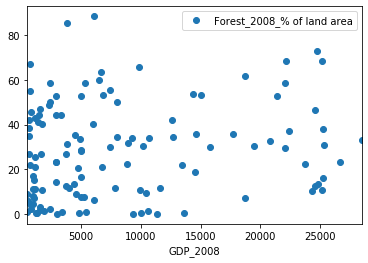

In [34]:
df_4.plot(y='Forest_2008_% of land area', x='GDP_2008', style='o')

In [35]:
df_5 = df_4.groupby('Country Income').mean().sort_values('GDP_2008')
df_5

,slope_agr,slope_forest,Forest_2008_% of land area,GDP_2008
Country Income,,,,
Low income,0.004603,-0.009841,21.667096,960.800000
Lower middle income,0.002895,-0.004109,24.871393,2418.071429
Upper middle income,0.002020,0.000237,30.830619,6977.277778
High income,-0.003978,0.005676,31.504365,17817.763158


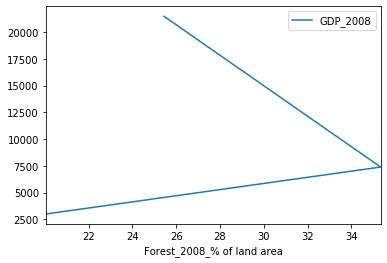

In [96]:
df_5.plot(x='Forest_2008_% of land area', y='GDP_2008')

In [110]:
meat_consumption.loc[meat_consumption['TIME'] == 2008]
df_meat = meat_consumption.loc[meat_consumption['MEASURE'] == 'KG_CAP']

df_meat_2008 = df_meat.groupby('LOCATION').mean().drop(columns= 'Flag Codes').drop(columns= 'TIME')
df_withmeat = pd.merge(df_4, df_meat_2008, how='left',left_on=['Country Code'],right_on=['LOCATION']).dropna()
df_sort_value = df_withmeat.sort_values('Value')
df_sort_value.rename(index=str,columns={'Value':'Meat_consumption_KG_CAP'},inplace=True)
df_sort_value

,Country Name,Country Code,Country Income,slope_agr,slope_forest,Forest_2008_% of land area,GDP_2008,Meat_consumption_KG_CAP
48,India,IND,Lower middle income,0.000458,0.003963,23.193137,2952.0,0.839948
81,Nigeria,NGA,Lower middle income,0.005506,-0.036284,10.826224,1711.0,1.426767
87,Pakistan,PAK,Lower middle income,0.000682,-0.021679,2.299969,2457.0,3.027898
111,Thailand,THA,Upper middle income,0.011052,0.006225,31.688623,8923.0,5.264769
90,Philippines,PHL,Lower middle income,0.008222,0.009118,23.253849,2888.0,6.516833
55,Japan,JPN,High income,-0.007656,0.000014,68.459807,22175.0,9.188181
119,Vietnam,VNM,Lower middle income,0.012395,0.019998,44.208081,2926.0,9.243112
116,Ukraine,UKR,Lower middle income,-0.000349,0.001649,16.500034,5028.0,9.283320
89,Peru,PER,Upper middle income,0.005882,-0.002085,58.670154,5376.0,9.586109
24,Colombia,COL,Upper middle income,0.001994,-0.003714,53.413013,6840.0,9.691788


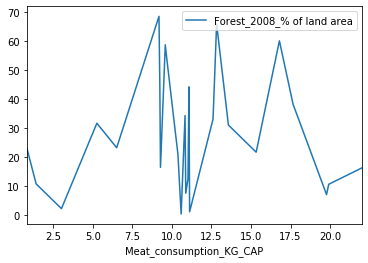

In [111]:
df_sort_value.plot(y='Forest_2008_% of land area', x='Meat_consumption_KG_CAP')

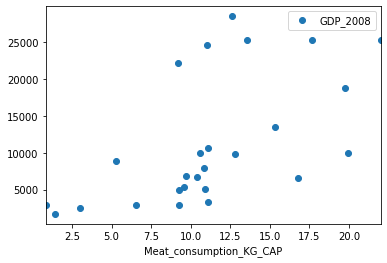

In [113]:
df_sort_value.plot(y='GDP_2008', x='Meat_consumption_KG_CAP', style = 'o')

In [114]:
df_group_by_income = df_sort_value.groupby('Country Income').mean().sort_values('Meat_consumption_KG_CAP')
df_group_by_income


,slope_agr,slope_forest,Forest_2008_% of land area,GDP_2008,Meat_consumption_KG_CAP
Country Income,,,,,
Lower middle income,0.004486,-0.003873,20.046882,2993.666667,5.056313
Upper middle income,0.006282,-0.001745,35.340241,7383.454545,11.671243
High income,-0.000261,0.002529,25.447310,21472.666667,14.636415


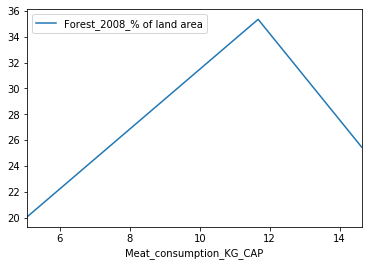

In [115]:
df_group_by_income.plot(y='Forest_2008_% of land area', x='Meat_consumption_KG_CAP')